# Machine learning applications in Cancer Screening and Detection

## Background
Every year over 11 lakh new cancer patients are registered across India.
It accounts for over 13% of all deaths worldwide.
One woman dies of cervical cancer every 8 minutes in India.
For every 2 women newly diagnosed with breast cancer, one woman dies of it in
India .
Presently in India, it is a major cause of morbidity and mortality. Many cancers are
preventable by controlling the modifiable risk factors such as tobacco use, alcohol
use, unhealthy diet and physical inactivity, amongst others. In addition, a significant
proportion of cancers can be cured, by surgery, radiotherapy or chemotherapy,
especially if they are detected early.
With large image datasets, such as radiology, cardiology, and pathology, machine
learning can be trained to look at images, identify abnormalities, and point to areas
that need attention, thus improving the accuracy of all these processes.
Long term, machine learning will benefit the family practitioner or internist at the
bedside.
Machine learning can offer an objective opinion to improve efficiency, reliability, and
accuracy.
## Aim
To apply machine learning techniques to two different use cases:
1. Screening Tests
2. Diagnostic Tests

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cervical Cancer Risk Factors (Screening Test)

## Attributes
* Age - Age of test subject
* IUD - If the subject used an IUD -> 1
* STDs - If the subject has had any STDs -> 1
* Schiller - Schiller Test which may be used to diagnose Cervical Cancer.
* Smokes - No. of years of smoking
* Number of sexual partners
* Hormonal Contraceptives
* Num of pregnancies


In [2]:
df_cancer = pd.read_csv('../input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv')
df_cancer = df_cancer.replace('?', np.nan)
# df_cancer = df_cancer.drop(DROP_COLUMNS, axis = 1)
df_cancer = df_cancer.rename(columns={'Biopsy': 'Cancer'})
df_cancer = df_cancer.apply(pd.to_numeric)
df_cancer = df_cancer.fillna(df_cancer.mean().to_dict())
df_cancer = df_cancer[['Age','Number of sexual partners','Hormonal Contraceptives','Num of pregnancies','Smokes (years)','IUD','STDs','Schiller','Cancer']]
X = df_cancer.drop('Cancer', axis=1)
y = df_cancer['Cancer']

df_cancer.head()

Age  Number of sexual partners   ...    Schiller  Cancer
0   18                        4.0   ...           0       0
1   15                        1.0   ...           0       0
2   34                        1.0   ...           0       0
3   52                        5.0   ...           0       0
4   46                        3.0   ...           0       0

[5 rows x 9 columns]

# Hypothesis
Cervical cancer is a cancer arising from the cervix. It is due to the abnormal growth of cells that have the ability to invade or spread to other parts of the body.

1. The risk of being diagnosed by cancer generally increases with Age. Thus we should be able to observe the trend in the dataset.
2. Risk of cervical cancer is higher in people who have contracted STDs or use Hormonal Contraceptives.
3. Schiller Test should also be a reliable to detect cancer.

In [3]:
df_cancer[df_cancer.Cancer==1].describe() #Statistics for subjects with Cancer

Age  Number of sexual partners   ...     Schiller  Cancer
count  55.000000                  55.000000   ...    55.000000    55.0
mean   28.636364                   2.518684   ...     0.872727     1.0
std     8.884784                   1.272804   ...     0.336350     0.0
min    16.000000                   1.000000   ...     0.000000     1.0
25%    21.000000                   2.000000   ...     1.000000     1.0
50%    28.000000                   2.000000   ...     1.000000     1.0
75%    34.500000                   3.000000   ...     1.000000     1.0
max    52.000000                   6.000000   ...     1.000000     1.0

[8 rows x 9 columns]

## Statistics
* From the data, we can observe that **Average age is 28.6** for a cancer patient.
* **65.6%** of patients have used Hormonal Contraceptives.
* 87% of patients have shown a Positive Result on Schiller Test
* Number of pregnancies is 2.5 on average



Next we use a RandomForest Classifier to train a model to predict Cancer in patients.

In [4]:
from imblearn.combine import SMOTETomek


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.25,random_state=2019)

cc = SMOTETomek(random_state=2019)
X_res, y_res = cc.fit_resample(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_res, y_res)
y_pred = random_forest.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Using TensorFlow backend.


Accuracy score: 0.958139534883721


We get an accuracy of 95.8% using the RandomForest classifier.
Below is a visualisation of the aggregated decision tree created by the classifier.

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

estimator = random_forest.estimators_[15]
export_graphviz(estimator, out_file='tree_limited.dot',feature_names=X.columns,class_names=["0","1"])
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=300

from IPython.display import Image
Image(filename = 'tree_limited.png')

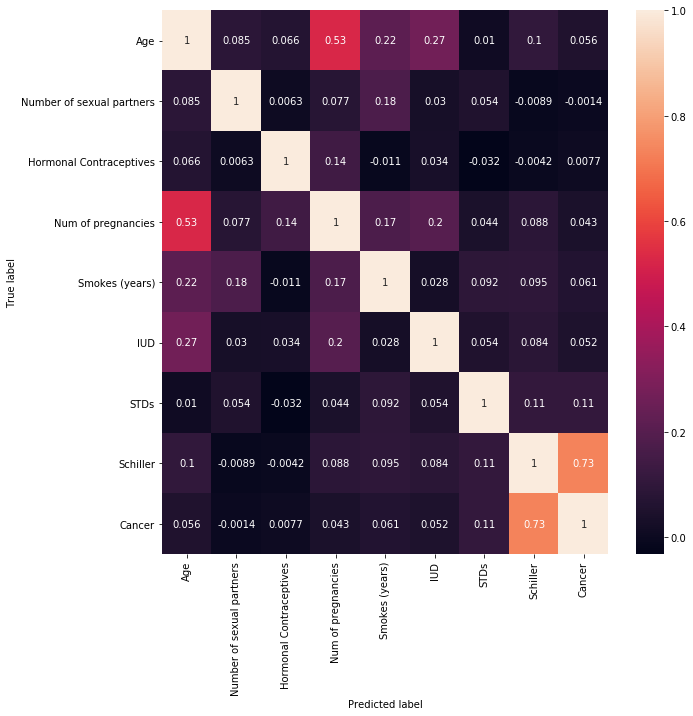

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cancer.corr(), annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The above Correlation Matrix displays a high correlation between Schiller's Test and Cancer Diagnosis. This speaks to the accuracy in predicting cancer through Schiller Test.

Next we use ELI5 , which show feature importances and explain predictions of decision trees and tree-based ensembles

In [7]:
import eli5
from eli5.sklearn import PermutationImportance

permumtation_impor = PermutationImportance(random_forest, random_state=15).fit(X_test, y_test)
eli5.show_weights(random_forest, feature_names = X_test.columns.tolist())

According to the result, Schiller test is highly related to the outcome, while #of pregnancies, STDs and Age also are important factors.

Next we try to see how Random Forest performs without Schiller Test attribute.

Accuracy score: 0.9069767441860465


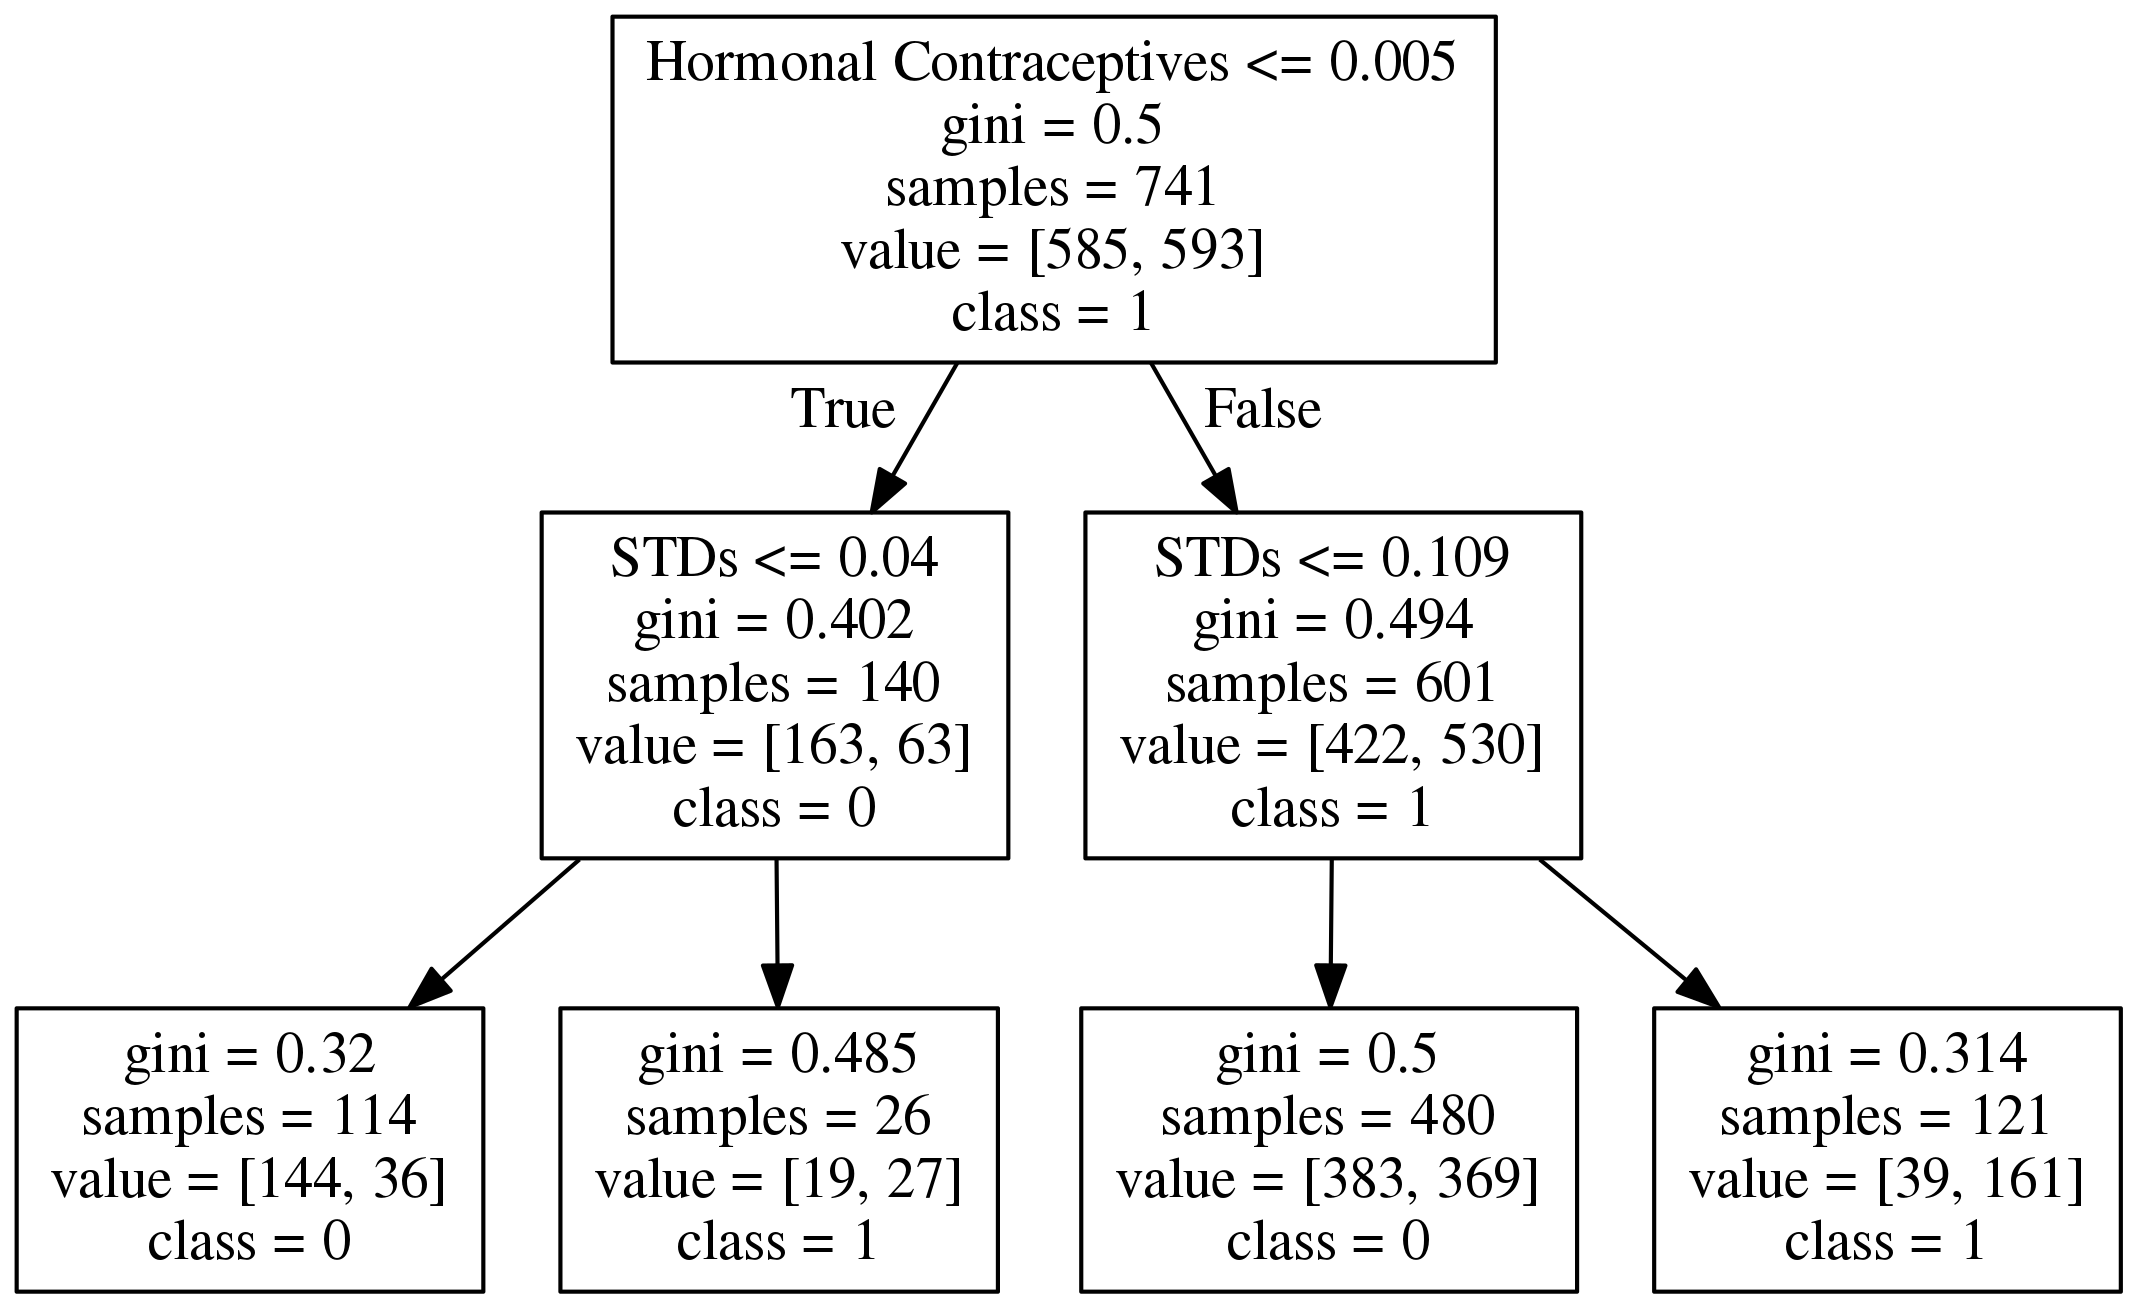

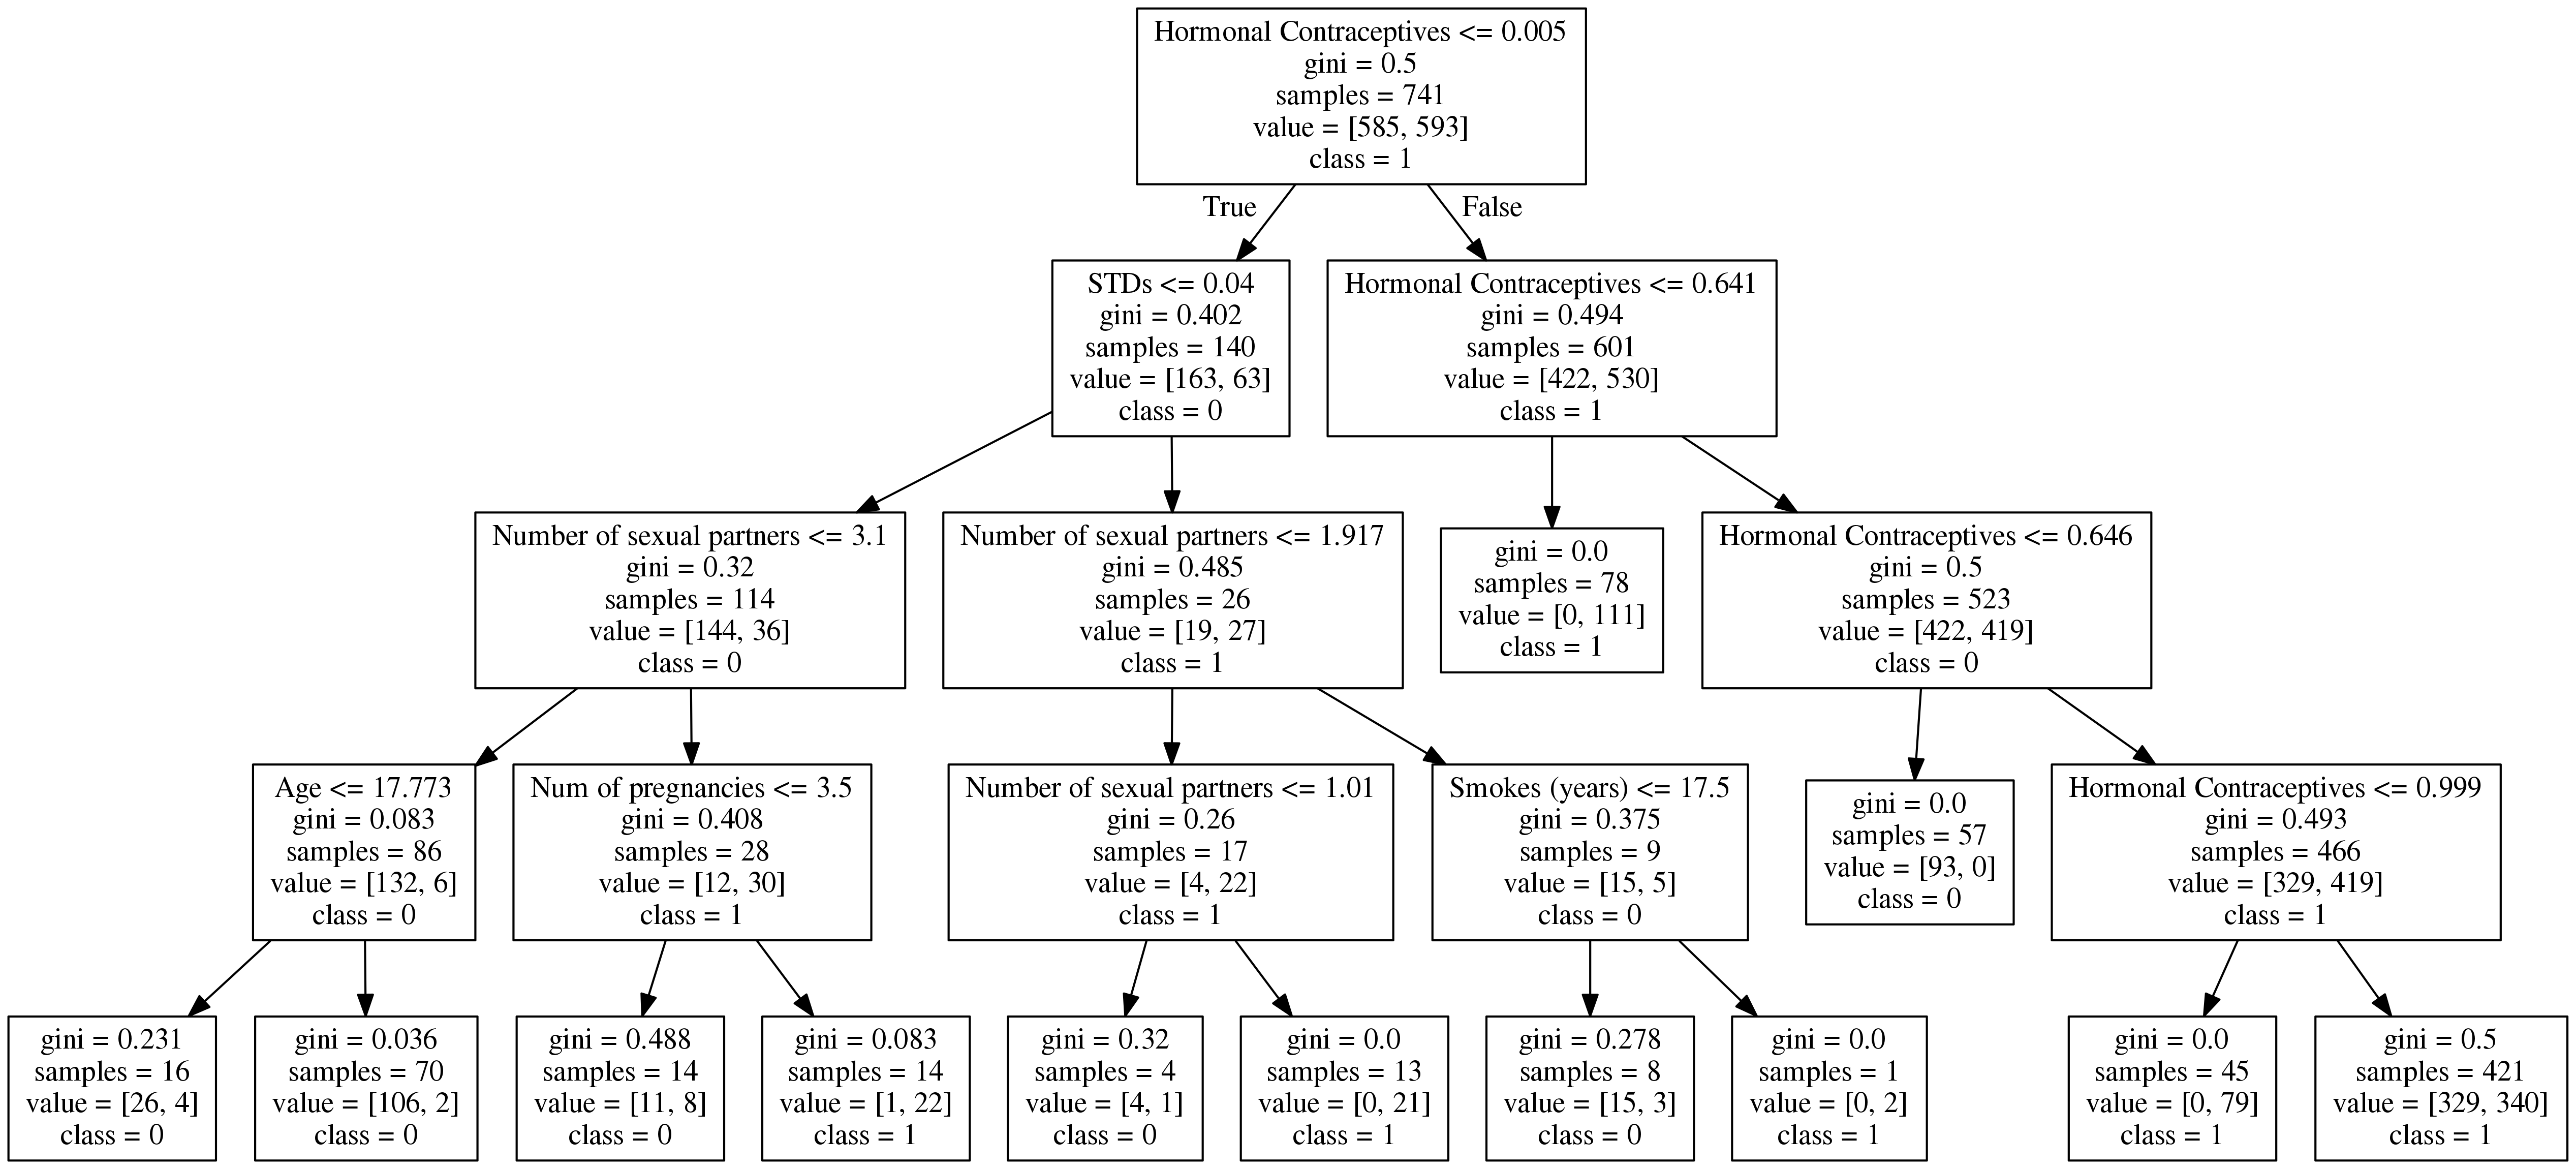

In [8]:
df_cancer = df_cancer[['Age','Number of sexual partners','Hormonal Contraceptives','Num of pregnancies','Smokes (years)','IUD','STDs','Cancer']]
X = df_cancer.drop('Cancer', axis=1)
y = df_cancer['Cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.25,random_state=2019)

cc = SMOTETomek(random_state=2019)
X_res, y_res = cc.fit_resample(X_train, y_train)

random_forest2 = RandomForestClassifier(n_estimators=100, random_state=2019).fit(X_res, y_res)
y_pred = random_forest2.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

random_forest2 = RandomForestClassifier(n_estimators=100, random_state=2019,max_depth=2).fit(X_res, y_res)
y_pred = random_forest2.predict(X_test)

estimator = random_forest2.estimators_[15]
export_graphviz(estimator, out_file='tree_limited.dot',feature_names=X.columns,class_names=["0","1"])
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=300

from IPython.display import Image
display(Image(filename = 'tree_limited.png'))


random_forest2 = RandomForestClassifier(n_estimators=100, random_state=2019,max_depth=4).fit(X_res, y_res)
y_pred = random_forest2.predict(X_test)

estimator = random_forest2.estimators_[15]
export_graphviz(estimator, out_file='tree_limited.dot',feature_names=X.columns,class_names=["0","1"])
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=300

from IPython.display import Image
Image(filename = 'tree_limited.png')

In [9]:
eli5.show_weights(random_forest2, feature_names = X_test.columns.tolist())

We notice a drop in Accuracy without availability of Schiller Test, to 90.69% .

The above graphs show the different trees made by the Random Forest Classifier.
Through the graphs and the weight-feature table , we see that having **STDs and use of Hormonal Contraceptive together increase Risk of Cervical Cancer tremendously.**

Other strong factors observed in data include Number of Pregnancies and use of IUD by the subject

**Thus, such a model can be used for screening tests to detect cervical cancer in people who do not have any symptoms of disease yet.**

# Histopathalogical Cancer Detection (Diagnostic Test)
###  What exactly is the problem?

**Binary image classification problem.** Identify the presence of metastases from 96 x 96px digital histopathology images. One key challenge is that the metastases can be as small as single cells in a large area of tissue.

### What is known about the domain?

**The histopathological images are glass slide microscope images of lymph nodes that are stained with hematoxylin and eosin (H&E).** This staining method is one of the most widely used in medical diagnosis and it produces blue, violet and red colors. Dark blue hematoxylin binds to negatively charged substances such as nucleic acids and pink eosin to positively charged substances like amino-acid side chains (most proteins). Typically nuclei are stained blue, whereas cytoplasm and extracellular parts in various shades of pink.



This dataset is a combination of two independent datasets collected in Radboud University Medical Center (Nijmegen, the Netherlands), and the University Medical Center Utrecht (Utrecht, the Netherlands). The slides are produced by routine clinical practices and a trained pathologist would examine similar images for identifying metastases.

## Hypothesis

Since cancer cells have larger and nuclei than normal, the deep learning model should be able to identify these regions of metastases.

![](https://i.ibb.co/r3NvzfQ/Screenshot-from-2019-04-15-23-17-30.png)

In [10]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

data = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')
train_path = '/kaggle/input/histopathologic-cancer-detection/train/'
test_path = '/kaggle/input/histopathologic-cancer-detection/test/'
# quick look at the label stats
data['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

Text(0, 0.5, 'Tumor tissue samples')

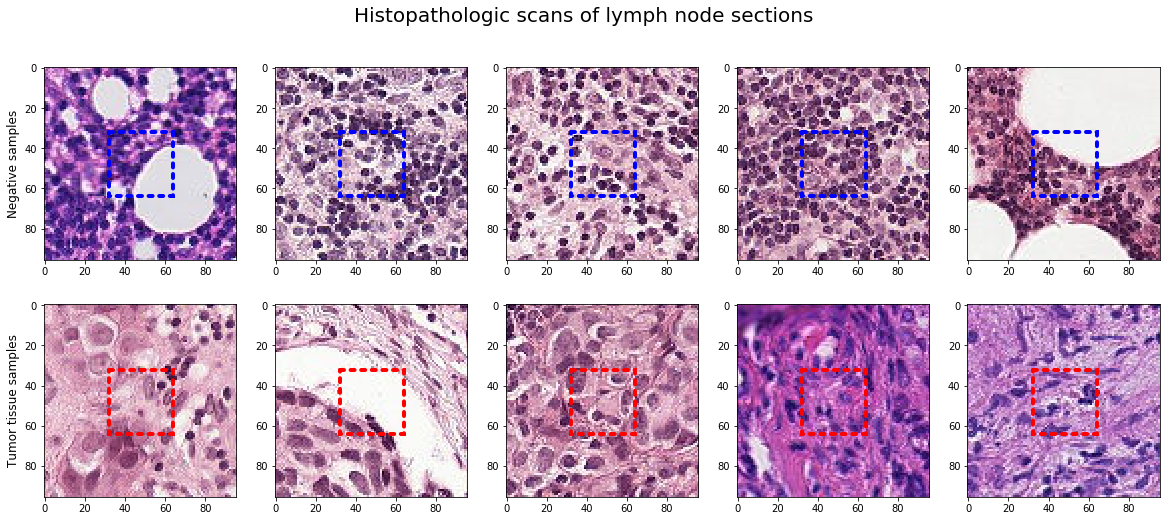

In [11]:
def readImage(path):
    # OpenCV reads the image in bgr format by default
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

# random sampling
shuffled_data = shuffle(data)

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)
# Negatives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[0,i].imshow(readImage(path + '.tif'))
    # Create a Rectangle patch
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
    ax[0,i].add_patch(box)
ax[0,0].set_ylabel('Negative samples', size='large')
# Positives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[1,i].imshow(readImage(path + '.tif'))
    # Create a Rectangle patch
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='r',facecolor='none', linestyle=':', capstyle='round')
    ax[1,i].add_patch(box)
ax[1,0].set_ylabel('Tumor tissue samples', size='large')

In [12]:
import random
ORIGINAL_SIZE = 96      # original size of the images - do not change

# AUGMENTATION VARIABLES
CROP_SIZE = 90          # final size after crop
RANDOM_ROTATION = 3    # range (0-180), 180 allows all rotation variations, 0=no change
RANDOM_SHIFT = 2        # center crop shift in x and y axes, 0=no change. This cannot be more than (ORIGINAL_SIZE - CROP_SIZE)//2 
RANDOM_BRIGHTNESS = 7  # range (0-100), 0=no change
RANDOM_CONTRAST = 5    # range (0-100), 0=no change
RANDOM_90_DEG_TURN = 1  # 0 or 1= random turn to left or right

def readCroppedImage(path, augmentations = True):
    # augmentations parameter is included for counting statistics from images, where we don't want augmentations
    
    # OpenCV reads the image in bgr format by default
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    
    if(not augmentations):
        return rgb_img / 255
    
    #random rotation
    rotation = random.randint(-RANDOM_ROTATION,RANDOM_ROTATION)
    if(RANDOM_90_DEG_TURN == 1):
        rotation += random.randint(-1,1) * 90
    M = cv2.getRotationMatrix2D((48,48),rotation,1)   # the center point is the rotation anchor
    rgb_img = cv2.warpAffine(rgb_img,M,(96,96))
    
    #random x,y-shift
    x = random.randint(-RANDOM_SHIFT, RANDOM_SHIFT)
    y = random.randint(-RANDOM_SHIFT, RANDOM_SHIFT)
    
    # crop to center and normalize to 0-1 range
    start_crop = (ORIGINAL_SIZE - CROP_SIZE) // 2
    end_crop = start_crop + CROP_SIZE
    rgb_img = rgb_img[(start_crop + x):(end_crop + x), (start_crop + y):(end_crop + y)] / 255
    
    # Random flip
    flip_hor = bool(random.getrandbits(1))
    flip_ver = bool(random.getrandbits(1))
    if(flip_hor):
        rgb_img = rgb_img[:, ::-1]
    if(flip_ver):
        rgb_img = rgb_img[::-1, :]
        
    # Random brightness
    br = random.randint(-RANDOM_BRIGHTNESS, RANDOM_BRIGHTNESS) / 100.
    rgb_img = rgb_img + br
    
    # Random contrast
    cr = 1.0 + random.randint(-RANDOM_CONTRAST, RANDOM_CONTRAST) / 100.
    rgb_img = rgb_img * cr
    
    # clip values to 0-1 range
    rgb_img = np.clip(rgb_img, 0, 1.0)
    
    return rgb_img

Text(0, 0.5, 'Tumor tissue samples')

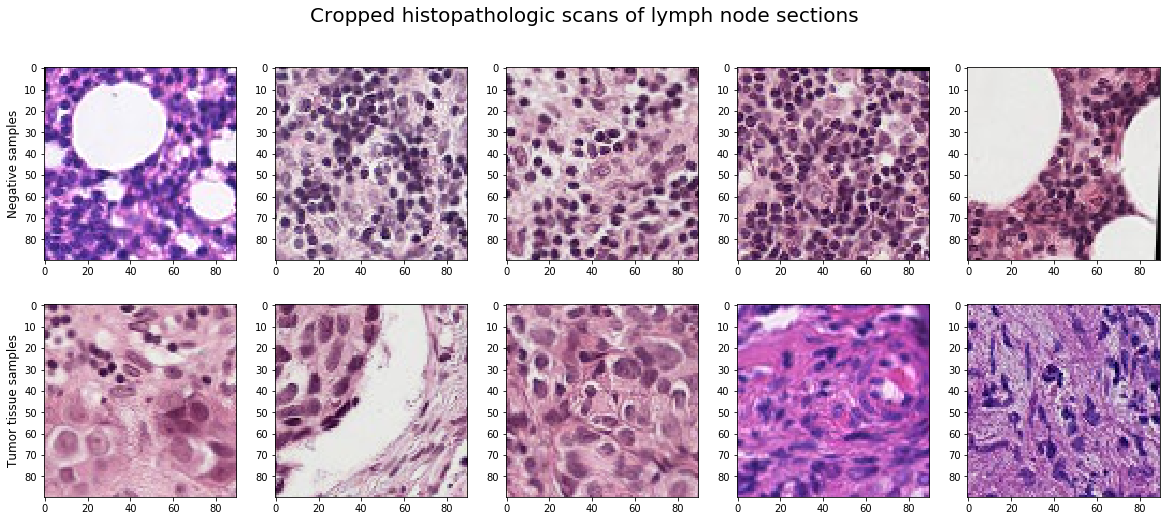

In [13]:
fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Cropped histopathologic scans of lymph node sections',fontsize=20)
# Negatives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[0,i].imshow(readCroppedImage(path + '.tif'))
ax[0,0].set_ylabel('Negative samples', size='large')
# Positives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[1,i].imshow(readCroppedImage(path + '.tif'))
ax[1,0].set_ylabel('Tumor tissue samples', size='large')

In [14]:
from sklearn.model_selection import train_test_split

# we read the csv file earlier to pandas dataframe, now we set index to id so we can perform
train_df = data.set_index('id')

#If removing outliers, uncomment the four lines below
#print('Before removing outliers we had {0} training samples.'.format(train_df.shape[0]))
#train_df = train_df.drop(labels=too_dark_idx, axis=0)
#train_df = train_df.drop(labels=too_bright_idx, axis=0)
#print('After removing outliers we have {0} training samples.'.format(train_df.shape[0]))

train_names = train_df.index.values
train_labels = np.asarray(train_df['label'].values)

# split, this function returns more than we need as we only need the validation indexes for fastai
tr_n, tr_idx, val_n, val_idx = train_test_split(train_names, range(len(train_names)), test_size=0.1, stratify=train_labels, random_state=123)

In [15]:
# fastai 1.0
from fastai import *
from fastai.vision import *
from torchvision.models import *    # import *=all the models from torchvision  

arch = densenet169                  # specify model architecture, densenet169 seems to perform well for this data but you could experiment
BATCH_SIZE = 128                    # specify batch size, hardware restrics this one. Large batch sizes may run out of GPU memory
sz = CROP_SIZE                      # input size is the crop size
MODEL_PATH = str(arch).split()[1]   # this will extrat the model name as the model file name e.g. 'resnet50'

In [16]:
# create dataframe for the fastai loader
train_dict = {'name': train_path + train_names, 'label': train_labels}
df = pd.DataFrame(data=train_dict)
# create test dataframe
test_names = []
for f in os.listdir(test_path):
    test_names.append(test_path + f)
df_test = pd.DataFrame(np.asarray(test_names), columns=['name'])

In [17]:
# Subclass ImageList to use our own image opening function
class MyImageItemList(ImageList):
    def open(self, fn:PathOrStr)->Image:
        img = readCroppedImage(fn.replace('/./','').replace('//','/'))
        # This ndarray image has to be converted to tensor before passing on as fastai Image, we can use pil2tensor
        return vision.Image(px=pil2tensor(img, np.float32))
    

In [18]:
# Create ImageDataBunch using fastai data block API
imgDataBunch = (MyImageItemList.from_df(path='/', df=df, suffix='.tif')
        #Where to find the data?
        .split_by_idx(val_idx)
        #How to split in train/valid?
        .label_from_df(cols='label')
        #Where are the labels?
        .add_test(MyImageItemList.from_df(path='/', df=df_test))
        #dataframe pointing to the test set?
        .transform(tfms=[[],[]], size=sz)
        # We have our custom transformations implemented in the image loader but we could apply transformations also here
        # Even though we don't apply transformations here, we set two empty lists to tfms. Train and Validation augmentations
        .databunch(bs=BATCH_SIZE)
        # convert to databunch
        .normalize([tensor([0.702447, 0.546243, 0.696453]), tensor([0.238893, 0.282094, 0.216251])])
        # Normalize with training set stats. These are means and std's of each three channel and we calculated these previously in the stats step.
       )

In [19]:
# Next, we create a convnet learner object
# ps = dropout percentage (0-1) in the final layer
def getLearner():
    return create_cnn(imgDataBunch, arch, pretrained=True, path='.', metrics=accuracy, ps=0.5, callback_fns=ShowGraph)

learner = getLearner()

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /tmp/.torch/models/densenet169-b2777c0a.pth
57365526it [00:11, 5173429.37it/s] 


In [20]:
# We can use lr_find with different weight decays and record all losses so that we can plot them on the same graph
# Number of iterations is by default 100, but at this low number of itrations, there might be too much variance
# from random sampling that makes it difficult to compare WD's. I recommend using an iteration count of at least 300 for more consistent results.
lrs = []
losses = []
wds = []
iter_count = 600

# WEIGHT DECAY = 1e-6
learner.lr_find(wd=1e-6, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-6')
learner = getLearner() #reset learner - this gets more consistent starting conditions

# WEIGHT DECAY = 1e-4
learner.lr_find(wd=1e-4, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-4')
learner = getLearner() #reset learner - this gets more consistent starting conditions

# WEIGHT DECAY = 1e-2
learner.lr_find(wd=1e-2, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-2')
learner = getLearner() #reset learner

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


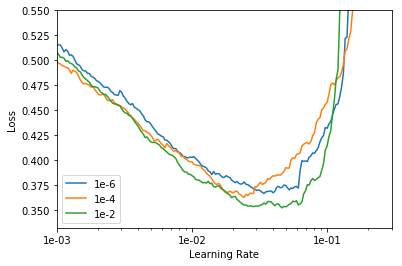

In [21]:
# Plot weight decays
_, ax = plt.subplots(1,1)
min_y = 0.5
max_y = 0.55
for i in range(len(losses)):
    ax.plot(lrs[i], losses[i])
    min_y = min(np.asarray(losses[i]).min(), min_y)
ax.set_ylabel("Loss")
ax.set_xlabel("Learning Rate")
ax.set_xscale('log')
#ax ranges may need some tuning with different model architectures 
ax.set_xlim((1e-3,3e-1))
ax.set_ylim((min_y - 0.02,max_y))
ax.legend(wds)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))

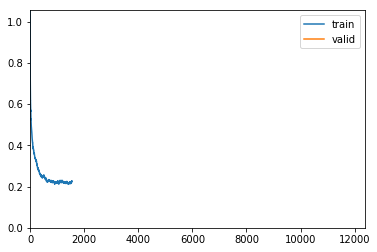

KeyboardInterrupt: 

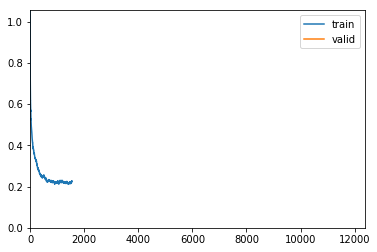

In [22]:
max_lr = 2e-2
wd = 1e-4
# 1cycle policy
learner.fit_one_cycle(cyc_len=8, max_lr=max_lr, wd=wd)

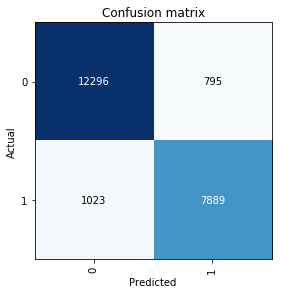

In [23]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(title='Confusion matrix')


In [24]:
learner.save(MODEL_PATH + '_stage1')

In [25]:
preds,y, loss = learner.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.921465277671814 %.


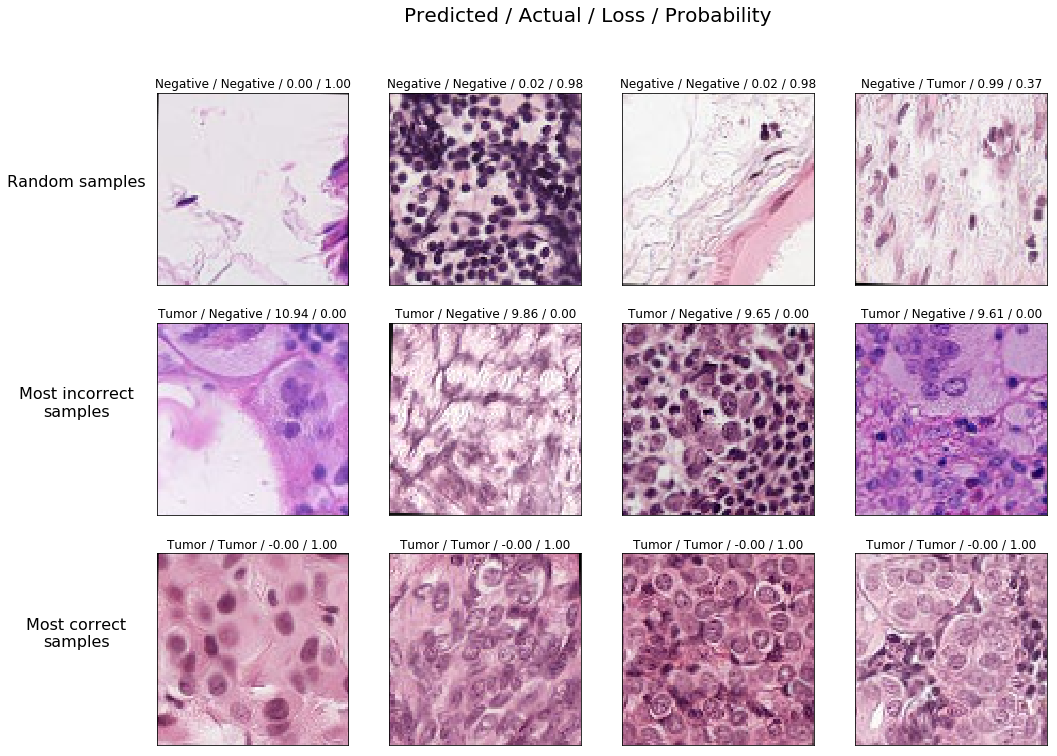

In [27]:
from random import randint

def plot_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
    # top losses will return all validation losses and indexes sorted by the largest first
    tl_val,tl_idx = interp.top_losses()
    #classes = interp.data.classes
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    fig.suptitle('Predicted / Actual / Loss / Probability',fontsize=20)
    # Random
    for i in range(4):
        random_index = randint(0,len(tl_idx))
        idx = tl_idx[random_index]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        im = image2np(im.data)
        cl = int(cl)
        ax[0,i].imshow(im)
        ax[0,i].set_xticks([])
        ax[0,i].set_yticks([])
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80)
    # Most incorrect or top losses
    for i in range(4):
        idx = tl_idx[i]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        im = image2np(im.data)
        ax[1,i].imshow(im)
        ax[1,i].set_xticks([])
        ax[1,i].set_yticks([])
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80)
    # Most correct or least losses
    for i in range(4):
        idx = tl_idx[len(tl_idx) - i - 1]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        im = image2np(im.data)
        ax[2,i].imshow(im)
        ax[2,i].set_xticks([])
        ax[2,i].set_yticks([])
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)
plot_overview(interp, ['Negative','Tumor'])


In [29]:
from fastai.callbacks.hooks import *

# hook into forward pass
def hooked_backward(m, oneBatch, cat):
    # we hook into the convolutional part = m[0] of the model
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(oneBatch)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

def getHeatmap(val_index):
    """Returns the validation set image and the activation map"""
    # this gets the model
    m = learner.model.eval()
    tensorImg,cl = imgDataBunch.valid_ds[val_index]
    # create a batch from the one image
    oneBatch,_ = imgDataBunch.one_item(tensorImg)
    oneBatch_im = vision.Image(imgDataBunch.denorm(oneBatch)[0])
    # convert batch tensor image to grayscale image with opencv
    cvIm = cv2.cvtColor(image2np(oneBatch_im.data), cv2.COLOR_RGB2GRAY)
    # attach hooks
    hook_a,hook_g = hooked_backward(m, oneBatch, cl)
    # get convolutional activations and average from channels
    acts = hook_a.stored[0].cpu()
    #avg_acts = acts.mean(0)

    # Grad-CAM
    grad = hook_g.stored[0][0].cpu()
    grad_chan = grad.mean(1).mean(1)
    grad.shape,grad_chan.shape
    mult = (acts*grad_chan[...,None,None]).mean(0)
    return mult, cvIm


def plot_heatmap_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
    # top losses will return all validation losses and indexes sorted by the largest first
    tl_val,tl_idx = interp.top_losses()
    #classes = interp.data.classes
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    fig.suptitle('Grad-CAM\nPredicted / Actual / Loss / Probability',fontsize=20)
    # Random
    for i in range(4):
        random_index = randint(0,len(tl_idx))
        idx = tl_idx[random_index]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[0,i].imshow(im)
        ax[0,i].imshow(im, cmap=plt.cm.gray)
        ax[0,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[0,i].set_xticks([])
        ax[0,i].set_yticks([])
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80)
    # Most incorrect or top losses
    for i in range(4):
        idx = tl_idx[i]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[1,i].imshow(im)
        ax[1,i].imshow(im, cmap=plt.cm.gray)
        ax[1,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[1,i].set_xticks([])
        ax[1,i].set_yticks([])
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80)
    # Most correct or least losses
    for i in range(4):
        idx = tl_idx[len(tl_idx) - i - 1]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[2,i].imshow(im)
        ax[2,i].imshow(im, cmap=plt.cm.gray)
        ax[2,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[2,i].set_xticks([])
        ax[2,i].set_yticks([])
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)

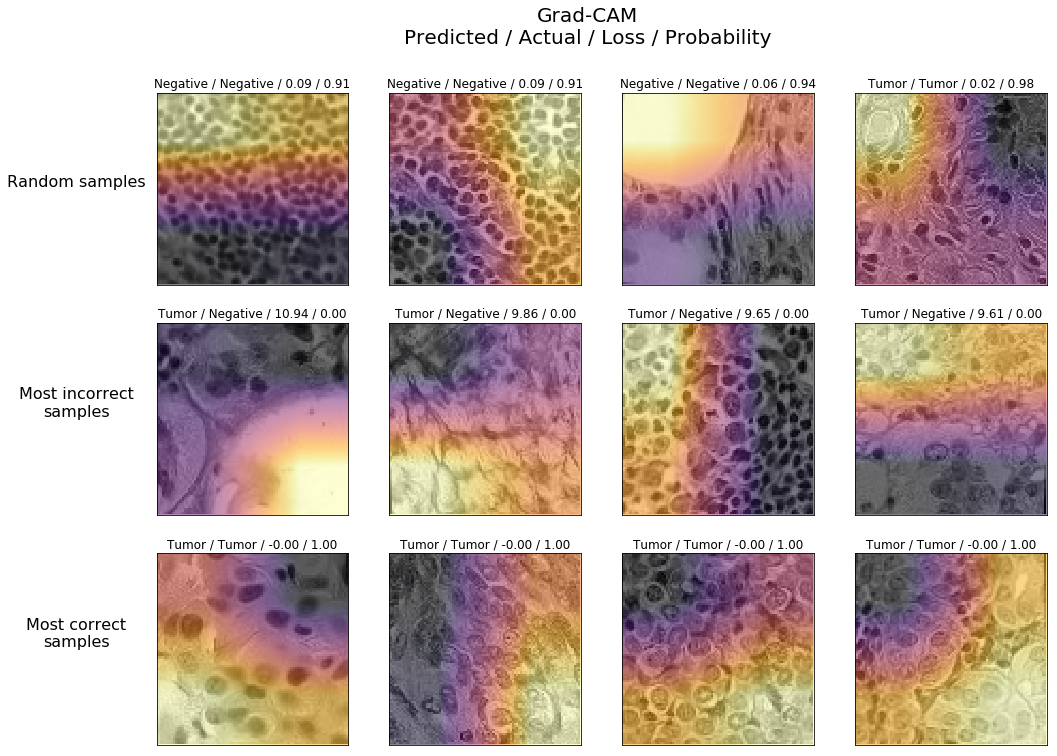

In [30]:
plot_heatmap_overview(interp, ['Negative','Tumor'])

![](https://3.bp.blogspot.com/-BCz28oA5THs/W7_1x671dkI/AAAAAAAADXg/h6OcOZnRZl0vN8mw02gNVcwglJTqE87bwCLcBGAs/s1600/image1.png)


![](https://3.bp.blogspot.com/-6mQ_1IuZT0A/W7_1YaKb_-I/AAAAAAAADXY/2AwLVld45Fchd6LsJXKcVD_zl-VQ3KcXgCLcBGAs/s1600/lyna_zoom_high_res.gif)

Left: sample views of a slide containing lymph nodes with a small metastatic breast tumor at progressively higher magnifications. Right: the same views when shown outlining the tumor in cyan.

![](https://camelyon17.grand-challenge.org/media/CAMELYON17/public_html/example_high_resolution.png)

**Thus the model is able to detect metastasis region by identifying large and dark nuclei in the images.**